### Naive Bayes - a probability model used to predict boolean values

In [1]:
# Importing the key libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importing the dataset to leverage
dataset = pd.read_csv("../logistic-regression/data/social_network_ads.csv")

In [5]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
# Establishing the matrix of independent variables as well as the vector of dependent variables
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [7]:
# Split the dataset into the training and the test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [8]:
# Scale the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
# Fit the Naive Bayes model to the training set
# The class is GaussianNB
from sklearn.naive_bayes import GaussianNB
# Creating the object classifier, calling the class
# There are minimal parameters to input, which makes it very simple
classifier = GaussianNB()
# Use the fit method to fit the classifier to the training set
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [15]:
# Predict the results
y_pred = classifier.predict(X_test)

In [18]:
print("this is y test", y_test)
print("------------------------")
print("this is y pred",y_pred)

this is y test [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]
------------------------
this is y pred [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1]


In [16]:
# Make the confusion matrix to understand initial model performance
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [13]:
print(cm)

[[65  3]
 [ 7 25]]


In [ ]:
# Interpretting the confusion matrix: 
# the number of incorrect predictions: 10 out of 100 predictions

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


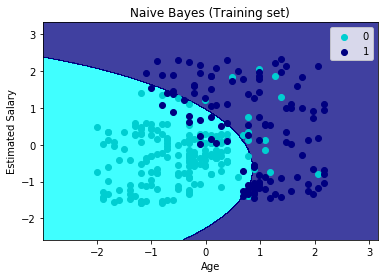

In [20]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('aqua', 'navy')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkturquoise', 'navy'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


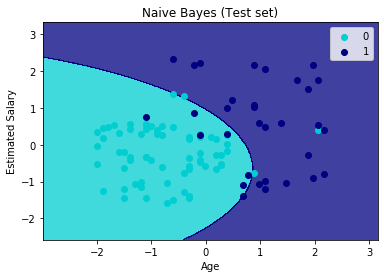

In [21]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('darkturquoise', 'navy')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkturquoise', 'navy'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [22]:
# Grabbing the probabilities as output
y_proba = classifier.predict_proba(X_test)
print(y_proba)

[[9.01529673e-01 9.84703268e-02]
 [8.46064562e-01 1.53935438e-01]
 [8.60522779e-01 1.39477221e-01]
 [9.26129406e-01 7.38705940e-02]
 [9.03777770e-01 9.62222302e-02]
 [9.58963388e-01 4.10366125e-02]
 [9.13248838e-01 8.67511623e-02]
 [4.42290869e-02 9.55770913e-01]
 [9.89958205e-01 1.00417951e-02]
 [4.86935106e-01 5.13064894e-01]
 [9.56160686e-01 4.38393136e-02]
 [9.66688604e-01 3.33113961e-02]
 [8.64844464e-01 1.35155536e-01]
 [7.38194221e-01 2.61805779e-01]
 [9.76748827e-01 2.32511727e-02]
 [5.20571575e-01 4.79428425e-01]
 [8.02472836e-01 1.97527164e-01]
 [9.80417191e-01 1.95828090e-02]
 [3.90206458e-03 9.96097935e-01]
 [8.69533158e-01 1.30466842e-01]
 [9.04157107e-01 9.58428930e-02]
 [5.57312678e-03 9.94426873e-01]
 [7.57793344e-01 2.42206656e-01]
 [1.32782850e-01 8.67217150e-01]
 [9.81050822e-01 1.89491780e-02]
 [5.02170410e-03 9.94978296e-01]
 [9.26333845e-01 7.36661554e-02]
 [9.34210958e-01 6.57890424e-02]
 [8.54352360e-01 1.45647640e-01]
 [8.73192024e-01 1.26807976e-01]
 [9.710957

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


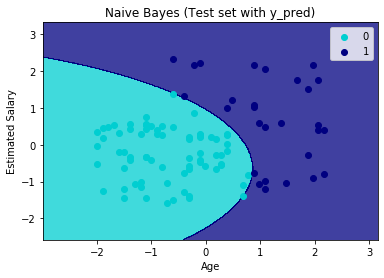

In [24]:
# Testing the y_pred and x_test
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_pred
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('darkturquoise', 'navy')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkturquoise', 'navy'))(i), label = j)
plt.title('Naive Bayes (Test set with y_pred)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()